In [1]:
!pip -q install efficient-apriori

In [2]:

from efficient_apriori import apriori

transactions = [
    ("milk", "bread"),
    ("milk", "eggs", "bread"),
    ("eggs", "flour"),
    ("milk", "eggs"),
    ("bread", "butter"),
]

itemsets, rules = apriori(
    transactions,
    min_support=0.2,
    min_confidence=0.5
)

print("Frequent itemsets:")
for k in itemsets:               # k is size of itemset, for example 1 item, 2 items
    print("k =", k, ",", itemsets[k])

print("\nRules:")
for r in rules:
    print(f"{r} [support={r.support:.2f}, conf={r.confidence:.2f}, lift={r.lift:.2f}]")


Frequent itemsets:
k = 1 , {('milk',): 3, ('bread',): 3, ('eggs',): 3, ('flour',): 1, ('butter',): 1}
k = 2 , {('bread', 'butter'): 1, ('bread', 'eggs'): 1, ('bread', 'milk'): 2, ('eggs', 'flour'): 1, ('eggs', 'milk'): 2}
k = 3 , {('bread', 'eggs', 'milk'): 1}

Rules:
{butter} -> {bread} (conf: 1.000, supp: 0.200, lift: 1.667, conv: 400000000.000) [support=0.20, conf=1.00, lift=1.67]
{milk} -> {bread} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{bread} -> {milk} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{flour} -> {eggs} (conf: 1.000, supp: 0.200, lift: 1.667, conv: 400000000.000) [support=0.20, conf=1.00, lift=1.67]
{milk} -> {eggs} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{eggs} -> {milk} (conf: 0.667, supp: 0.400, lift: 1.111, conv: 1.200) [support=0.40, conf=0.67, lift=1.11]
{eggs, milk} -> {bread} (conf: 0.500, supp: 0.200, lift: 0.833, con

| Metric         | Meaning                                                                                      | How to Read                          |
| -------------- | -------------------------------------------------------------------------------------------- | ------------------------------------ |
| **Support**    | Fraction of all baskets that contain both sides of the rule                                  | How common the rule is overall       |
| **Confidence** | Probability that a basket with the left side also contains the right side                    | Strength of the rule                 |
| **Lift**       | How much more likely the right side is bought *with* the left side compared to random chance | Lift > 1 = positive association      |
| **Conviction** | Alternative measure of rule strength; higher = stronger relationship                         | Used less often in beginner analysis |


**Example 1**

{butter} -> {bread} (conf: 1.000, supp: 0.200, lift: 1.667)

Appears in 20% of all baskets.

Confidence 1.0 = Every basket that had butter also had bread.

Lift 1.67 = People who buy butter are 1.67× more likely to buy bread than average.


**Example 2**

{milk} -> {bread} (conf: 0.667, supp: 0.400, lift: 1.111)

40% of all baskets have both milk and bread.

Confidence 0.667 = 2 out of 3 baskets with milk also have bread.

Lift 1.11 = Slightly above 1 → weak positive association.
Not very strong, but still mildly related.

**Example 3**

{eggs, milk} -> {bread} (conf: 0.500, supp: 0.200, lift: 0.833)

Only 20% of all baskets have all three together.

Confidence 0.5 = half of the baskets with eggs and milk also have bread.

Lift < 1 → actually a negative association (having eggs & milk makes bread slightly less likely than random).
Not interesting, ignore for recommendations.

In [ ]:

!pip -q install efficient-apriori pandas

In [3]:
import pandas as pd
from efficient_apriori import apriori

df = pd.read_csv("Bakery.csv", parse_dates=["DateTime"])
df = df[["TransactionNo", "Items", "DateTime", "DayType"]].dropna()
df = df[df["Items"].astype(str).str.lower() != "none"]

def mine_rules(df_slice, title, min_sup=0.01, min_conf=0.2, top=10):
    baskets = (
        df_slice.groupby("TransactionNo")["Items"]
                .apply(tuple)
                .tolist()
    )
    if not baskets:
        print(f"\n{title}: no baskets")
        return
    itemsets, rules = apriori(baskets, min_support=min_sup, min_confidence=min_conf)
    print(f"\n{title}: top {top} rules by lift")
    for r in sorted(rules, key=lambda x: x.lift, reverse=True)[:top]:
        print(f"{r} [support={r.support:.3f}, conf={r.confidence:.3f}, lift={r.lift:.3f}]")

mine_rules(df, "All days, all transactions", min_sup=0.01, min_conf=0.2, top=15)

df["Weekday"] = df["DateTime"].dt.day_name()
for day in df["Weekday"].dropna().unique():
    mine_rules(df[df["Weekday"] == day], f"Day wise, {day}", min_sup=0.01, min_conf=0.2, top=10)

for tag in df["DayType"].dropna().unique():
    mine_rules(df[df["DayType"] == tag], f"Day type, {tag}", min_sup=0.01, min_conf=0.2, top=10)




All days, all transactions: top 15 rules by lift
{Coffee, Tea} -> {Cake} (conf: 0.201, supp: 0.010, lift: 1.938, conv: 1.122) [support=0.010, conf=0.201, lift=1.938]
{Cake} -> {Tea} (conf: 0.229, supp: 0.024, lift: 1.605, conv: 1.112) [support=0.024, conf=0.229, lift=1.605]
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.472, conv: 1.765) [support=0.024, conf=0.704, lift=1.472]
{Sandwich} -> {Tea} (conf: 0.200, supp: 0.014, lift: 1.402, conv: 1.072) [support=0.014, conf=0.200, lift=1.402]
{Spanish Brunch} -> {Coffee} (conf: 0.599, supp: 0.011, lift: 1.252, conv: 1.300) [support=0.011, conf=0.599, lift=1.252]
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.190, conv: 1.211) [support=0.035, conf=0.569, lift=1.190]
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.048, lift: 1.154, conv: 1.165) [support=0.048, conf=0.552, lift=1.154]
{Alfajores} -> {Coffee} (conf: 0.541, supp: 0.020, lift: 1.130, conv: 1.136) [support=0.020, conf=0.541, lift=1.130]
{Juice} -> {Coffee} (conf: 0

# **Better Visualization**

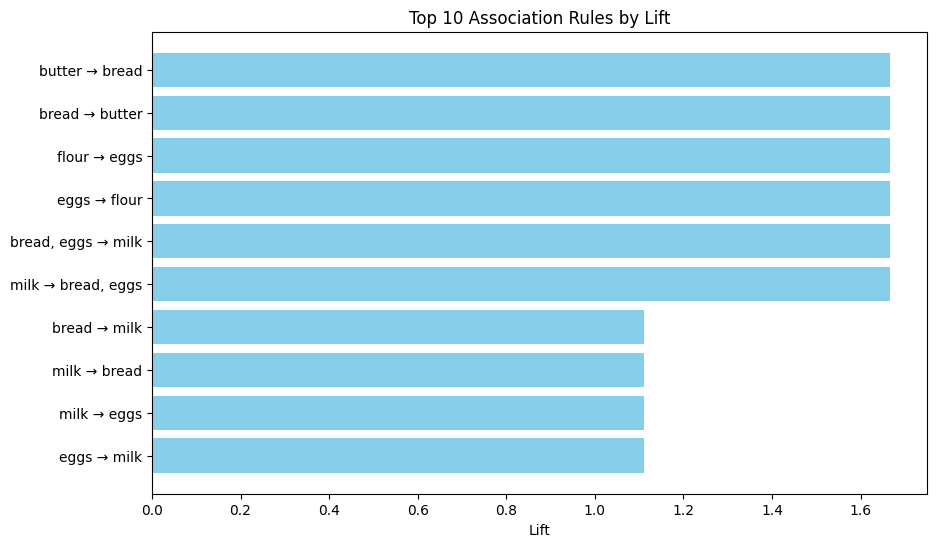

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.2)

rules_df = pd.DataFrame([{
    'Rule': f"{', '.join(list(r.lhs))} → {', '.join(list(r.rhs))}",
    'Support': r.support,
    'Confidence': r.confidence,
    'Lift': r.lift
} for r in rules])

rules_df = rules_df.sort_values('Lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(rules_df['Rule'], rules_df['Lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


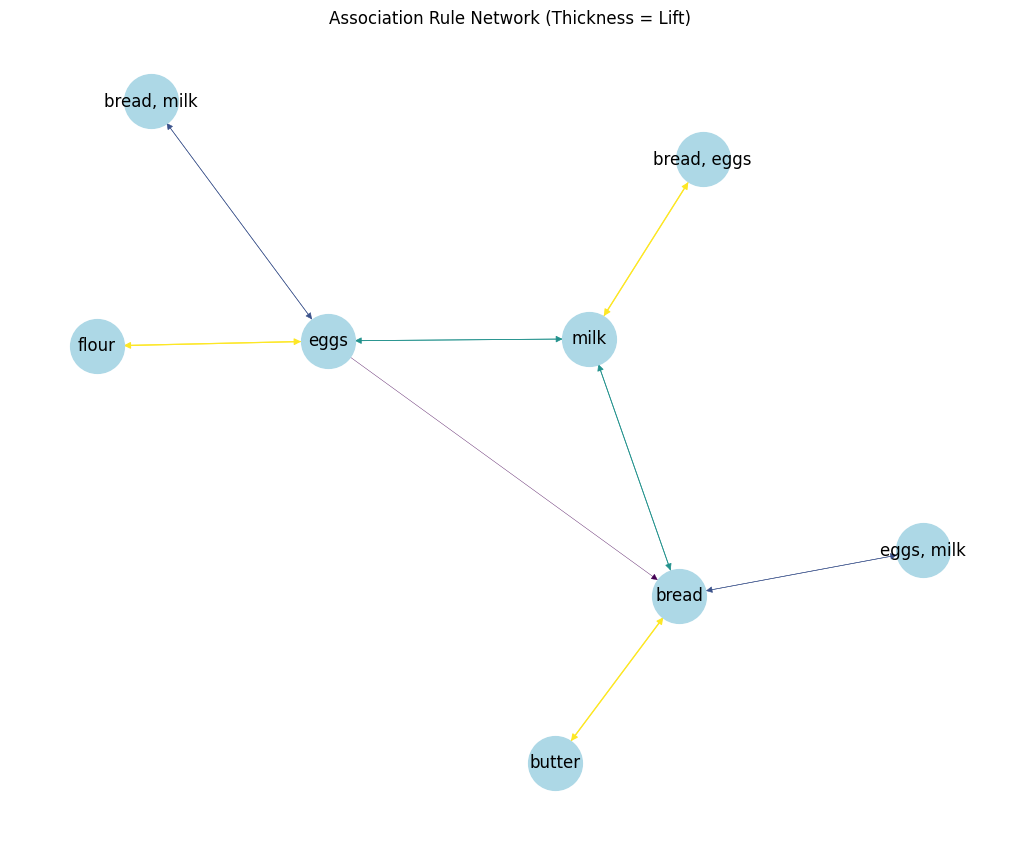

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for r in sorted(rules, key=lambda x: x.lift, reverse=True)[:15]:
    lhs = ', '.join(list(r.lhs))
    rhs = ', '.join(list(r.rhs))
    G.add_edge(lhs, rhs, weight=r.lift)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.4)
edges = G.edges(data=True)

weights = [d['weight'] for (_, _, d) in edges]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500,
        edge_color=weights, width=[w/2 for w in weights], cmap=plt.cm.Blues, arrows=True)

plt.title("Association Rule Network (Thickness = Lift)")
plt.show()


In [6]:
!pip -q install efficient-apriori pandas matplotlib

Frequent itemsets:
k = 1 -> {('Inception',): 5, ('Interstellar',): 5, ('The Dark Knight',): 5, ('Batman Begins',): 2, ('Tenet',): 3, ('Joker',): 4, ('The Batman',): 2}
k = 2 -> {('Batman Begins', 'The Dark Knight'): 2, ('Inception', 'Interstellar'): 3, ('Inception', 'Tenet'): 2, ('Inception', 'The Dark Knight'): 3, ('Interstellar', 'Tenet'): 3, ('Joker', 'The Batman'): 2, ('Joker', 'The Dark Knight'): 3}
k = 3 -> {('Inception', 'Interstellar', 'Tenet'): 2}

Top rules by lift:
The Batman -> Joker  [support=0.20, confidence=1.00, lift=2.50]
Joker -> The Batman  [support=0.20, confidence=0.50, lift=2.50]
Inception, Interstellar -> Tenet  [support=0.20, confidence=0.67, lift=2.22]
Tenet -> Inception, Interstellar  [support=0.20, confidence=0.67, lift=2.22]
Batman Begins -> The Dark Knight  [support=0.20, confidence=1.00, lift=2.00]
Tenet -> Interstellar  [support=0.30, confidence=1.00, lift=2.00]
Interstellar -> Tenet  [support=0.30, confidence=0.60, lift=2.00]
Inception, Tenet -> Interste

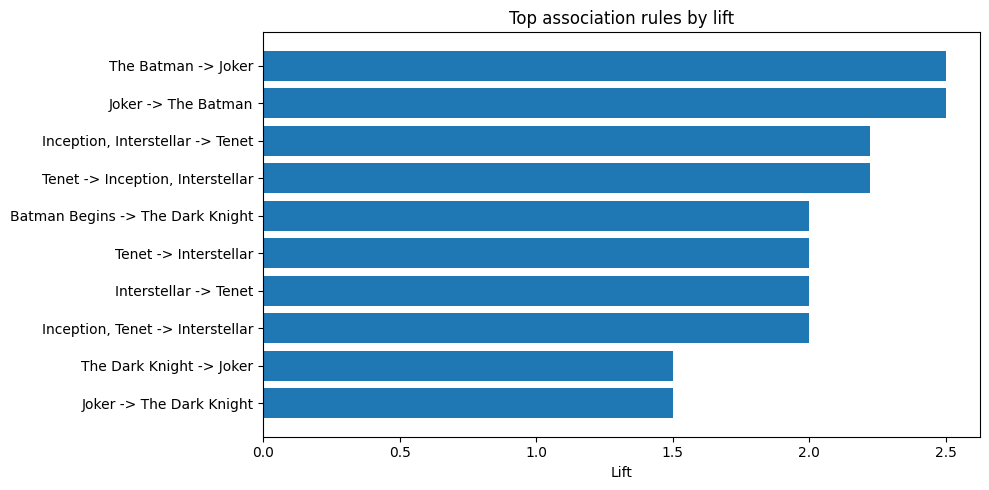

In [7]:

from efficient_apriori import apriori
import pandas as pd
import matplotlib.pyplot as plt

watch_history = [
    ("Inception", "Interstellar", "The Dark Knight"),
    ("Inception", "The Dark Knight", "Batman Begins"),
    ("Inception", "Interstellar", "Tenet"),
    ("The Dark Knight", "Joker", "Batman Begins"),
    ("Interstellar", "Gravity", "The Martian"),
    ("The Dark Knight", "Inception", "Joker"),
    ("Interstellar", "Tenet", "Arrival"),
    ("Joker", "The Batman", "The Dark Knight"),
    ("Inception", "Tenet", "Interstellar"),
    ("The Batman", "Joker", "Dark Knight Rises"),
]

itemsets, rules = apriori(
    watch_history,
    min_support=0.2,
    min_confidence=0.5
)

print("Frequent itemsets:")
for k in sorted(itemsets):
    print(f"k = {k} -> {itemsets[k]}")

print("\nTop rules by lift:")
sorted_rules = sorted(rules, key=lambda r: r.lift, reverse=True)
for r in sorted_rules[:10]:
    lhs = ", ".join(list(r.lhs))
    rhs = ", ".join(list(r.rhs))
    print(f"{lhs} -> {rhs}  [support={r.support:.2f}, confidence={r.confidence:.2f}, lift={r.lift:.2f}]")

def recommend_from(movie, rules, top_n=5):
    rows = []
    for r in rules:
        if movie in r.lhs and len(r.rhs) == 1:
            rec = list(r.rhs)[0]
            rows.append((rec, r.confidence, r.lift))
    if not rows:
        return pd.DataFrame(columns=["Recommended", "Confidence", "Lift"])
    recs = pd.DataFrame(rows, columns=["Recommended", "Confidence", "Lift"])
    return recs.sort_values(["Lift", "Confidence"], ascending=False).head(top_n)

print("\nRecommendations for Inception:")
print(recommend_from("Inception", rules))

print("\nRecommendations for Joker:")
print(recommend_from("Joker", rules))

def rules_to_df(rules, top_n=10):
    data = []
    for r in sorted(rules, key=lambda x: x.lift, reverse=True)[:top_n]:
        lhs = ", ".join(list(r.lhs))
        rhs = ", ".join(list(r.rhs))
        data.append({
            "Rule": f"{lhs} -> {rhs}",
            "Support": r.support,
            "Confidence": r.confidence,
            "Lift": r.lift
        })
    return pd.DataFrame(data)

top_rules_df = rules_to_df(rules, top_n=10)
if not top_rules_df.empty:
    plt.figure(figsize=(10, 5))
    plt.barh(top_rules_df["Rule"], top_rules_df["Lift"])
    plt.xlabel("Lift")
    plt.title("Top association rules by lift")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("\nNo rules found. Try lowering thresholds, for example support 0.15 and confidence 0.4.")


